In [40]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
df=pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [43]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
df.shape


(150, 6)

In [45]:
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

encode the species to numbers


In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Species']=labelencoder.fit_transform(df['Species'])

In [47]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [48]:

df.drop(columns=['Id'], inplace=True)



In [49]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


scale and split the data

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Select the columns to scale
columns_to_scale = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_features = scaler.fit_transform(df[columns_to_scale])

# Replace the original columns with scaled values
df[columns_to_scale] = scaled_features


In [51]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [52]:
df.drop(columns=['SepalWidthCm' , 'PetalWidthCm'], inplace=True)
df.head()


,SepalLengthCm,PetalLengthCm,Species
0,-0.900681,-1.341272,0
1,-1.143017,-1.341272,0
2,-1.385353,-1.398138,0
3,-1.506521,-1.284407,0
4,-1.021849,-1.341272,0


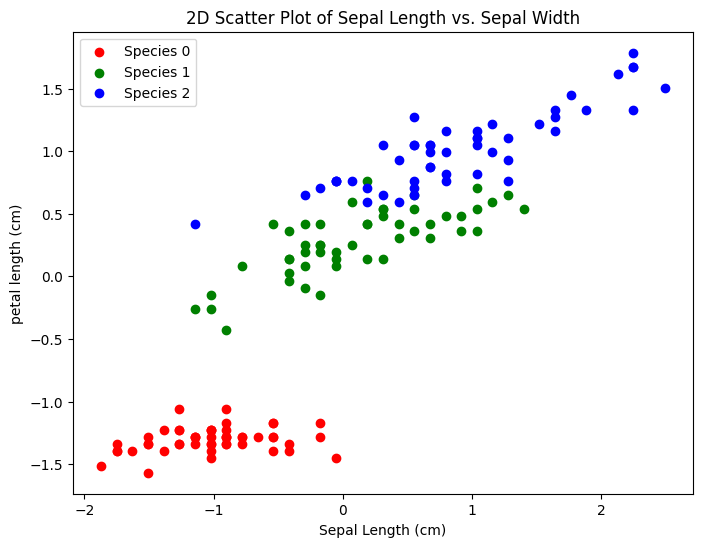

In [53]:
plt.figure(figsize=(8, 6))

# Define colors for each class (species)
colors = ['red', 'green', 'blue']

for species, color in zip(df['Species'].unique(), colors):
    subset = df[df['Species'] == species]
    plt.scatter(subset['SepalLengthCm'], subset['PetalLengthCm'], color=color, label=f'Species {species}')

# Set labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('petal length (cm)')
plt.title('2D Scatter Plot of Sepal Length vs. Sepal Width')

# Display the legend
plt.legend()

plt.show()

In [54]:
#extract x and y
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
#train the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(multi_class='multinomial')

classifier.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [56]:
y_pred=classifier.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [59]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [60]:
#prediction
query=np.array([[3.4,2.7]])
#this function will give softmax functions output
classifier.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[3.06901647e-10, 2.91160817e-04, 9.99708839e-01]])

In [61]:
classifier.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


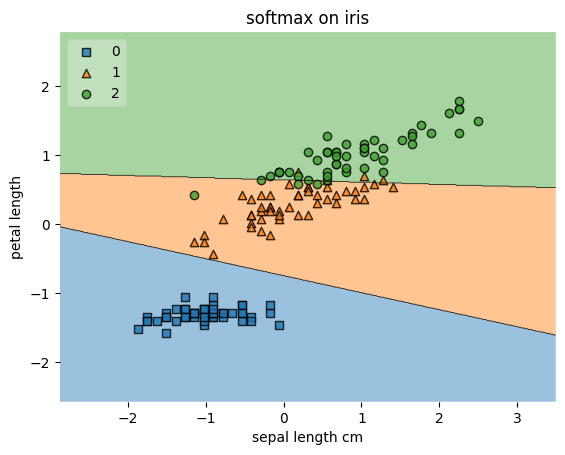

In [65]:
#plot
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,classifier,legend=2)

plt.xlabel('sepal length cm')
plt.ylabel('petal length')
plt.title('softmax on iris')

plt.show()